In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("amazon.csv",encoding="iso-8859-1")

In [5]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [7]:
print("Number of rows",data.shape[0])
print("Number of coulmns",data.shape[1])

Number of rows 6454
Number of coulmns 5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [12]:
data_dup=data.duplicated().any()

In [13]:
data.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [14]:
6454-6422

32

In [15]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [16]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [21]:
data.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [27]:
data["month_e"]=data.month.map({'Janeiro':'Jan',
               'Fevereiro': 'Feb',
               'Março':'Mar',
              'Abril':'April',
              'Maio':'May',
              'Junho':'June',
               'Julho':'July',
               'Agosto':'Aug',
               'Setembro':'Sep',
               'Outubro':'Oct',
               'Novembro':'Nov',
               'Dezembro':'Dec'})

In [28]:
data.head()

,year,state,month,number,date,month_e
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


In [30]:
data.groupby("month_e")["number"].sum()

month_e
April    28188.770
Aug      88050.435
Dec      57535.480
Feb      30848.050
Jan      47747.844
July     92326.113
June     56010.675
Mar      30717.405
May      34731.363
Nov      85508.054
Oct      88681.579
Sep      58578.305
Name: number, dtype: float64

<AxesSubplot:xlabel='month_e', ylabel='number'>

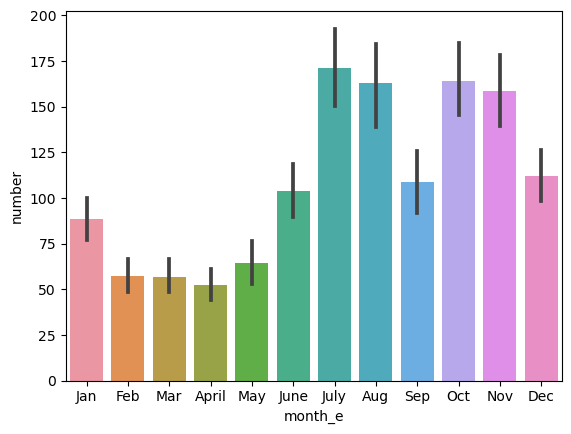

In [31]:
sns.barplot(x="month_e",y="number",data=data)

In [36]:
data1=data.groupby("year")["number"].sum()
data1

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

In [44]:
data.groupby("state")["number"].sum()

state
Acre                18464.030
Alagoas              4644.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52435.918
Pará                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45160.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

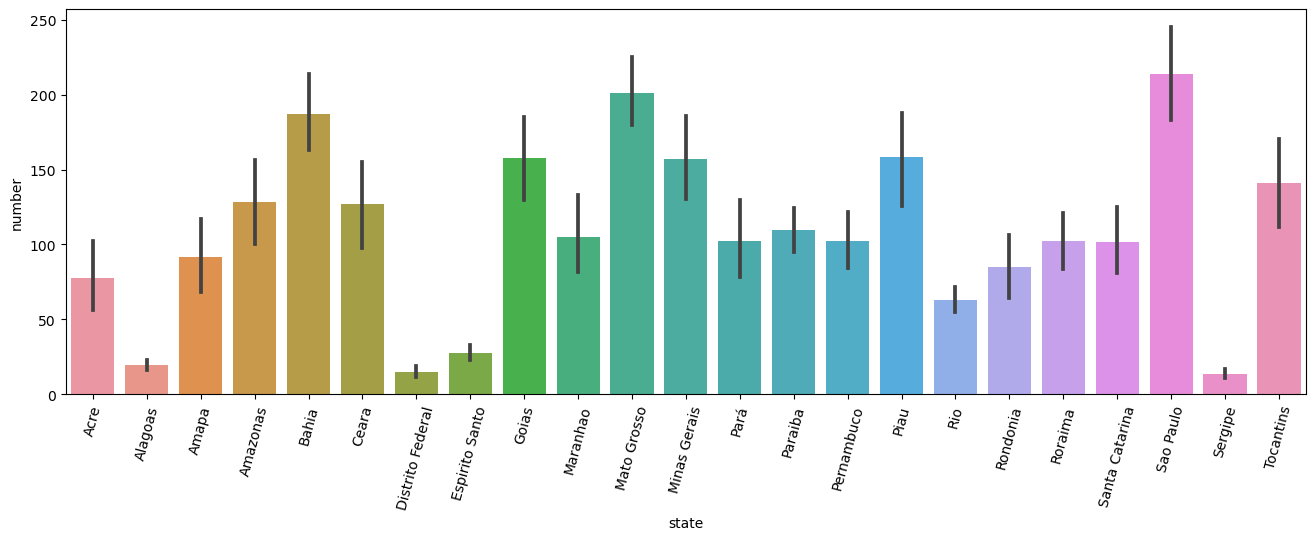

In [50]:
data.groupby("state")["number"].sum()
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data)
plt.xticks(rotation=75)
plt.show()

In [53]:
data.number.sum()

698924.073

In [57]:
data[data["state"]=="Amazonas"]['number'].sum()

30650.129

In [59]:
data4=data[data["state"]=="Amazonas"]

In [101]:
data4.groupby('year')["number"].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Figure size 1600x500 with 0 Axes>

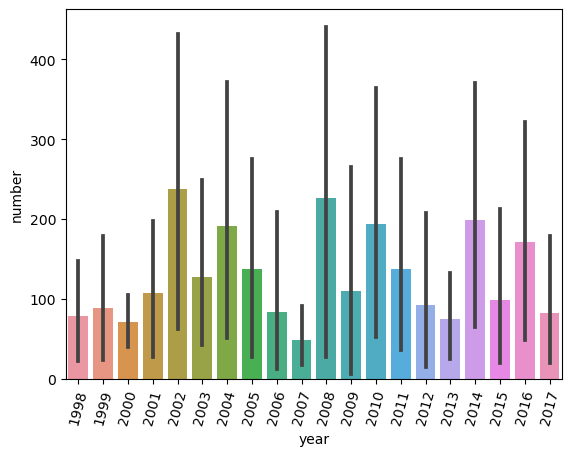

<Figure size 1600x500 with 0 Axes>

In [102]:
sns.barplot(x="year",y="number",data=data4)
plt.xticks(rotation=75)
plt.figure(figsize=(16,5))

In [76]:
data.dtypes

year         int64
state       object
month       object
number     float64
date        object
month_e     object
dtype: object

In [84]:
data["date"]=pd.to_datetime(data.date)

In [85]:
data5=data[data["state"]=="Amazonas"]

In [92]:
day=data5.groupby(data5['date'].dt.dayofweek).sum().number

import calendar

day.index=[calendar.day_name[x] for x in range (0,7)]
day.reset_index()

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


In [99]:
data6=data[data["year"]==2015].groupby("month_e")["number"].sum().reset_index()

<AxesSubplot:xlabel='month_e', ylabel='number'>

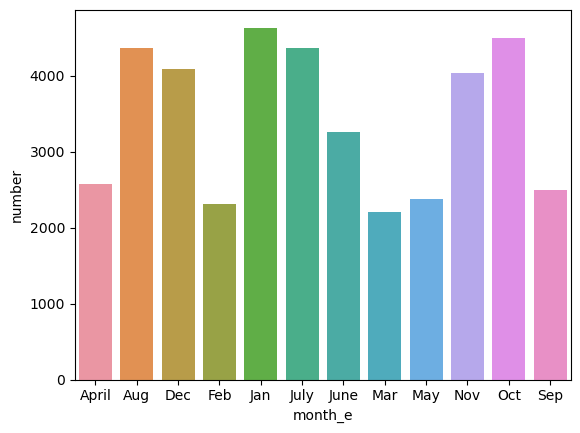

In [100]:
sns.barplot(x="month_e",y="number",data=data6)

In [106]:
data7=data.groupby('state')['number'].mean().sort_values(ascending= False).reset_index()

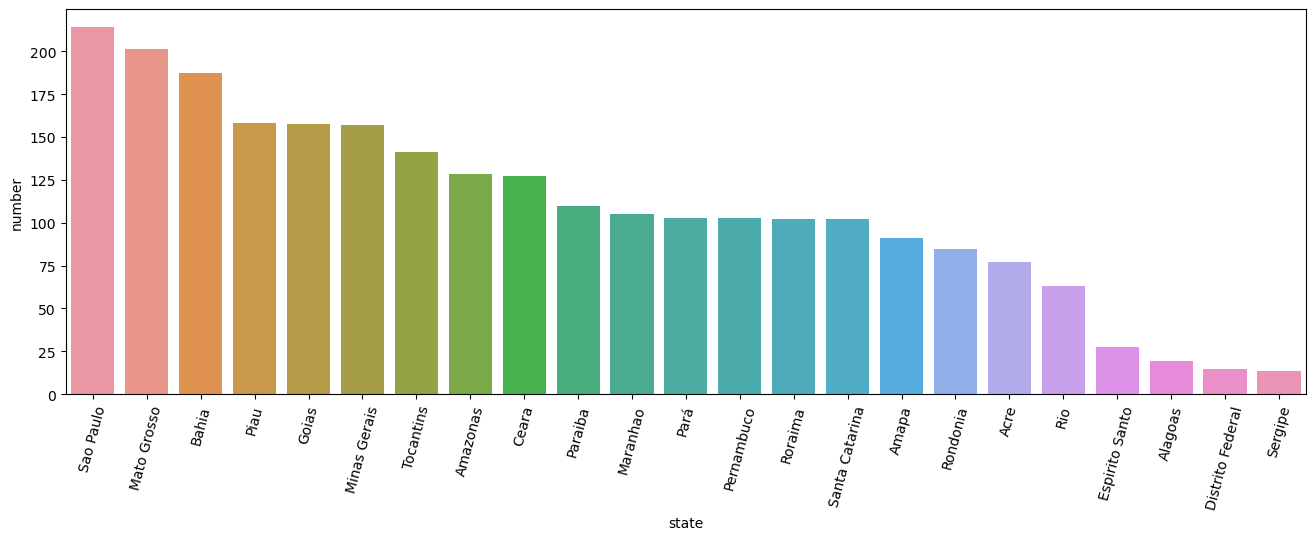

In [109]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data7)
plt.xticks(rotation=75)
plt.show()

In [113]:
data8=data[data["month_e"]=="Dec"]["state"]

In [114]:
data8.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)